In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load Titanic Dataset
df = pd.read_csv('/content/titanic_train.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print(df.head())  # Displaying the first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Displaying the last 5 rows
print(df.tail())

     Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
886         0       2    1  27.0      0      0  13.00         2
887         1       1    0  19.0      0      0  30.00         2
888         0       3    0  28.0      1      2  23.45         2
889         1       1    1  26.0      0      0  30.00         0
890         0       3    1  32.0      0      0   7.75         1


In [ ]:
# Checking data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Summary
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


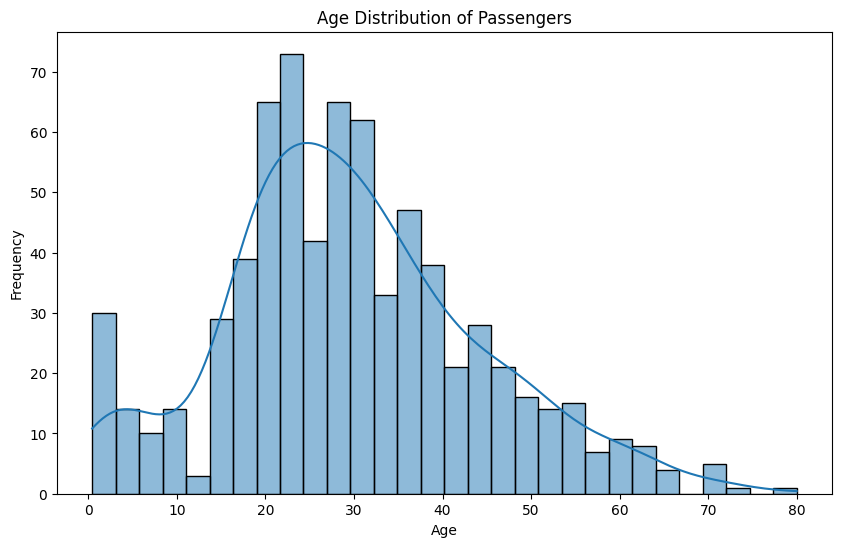

In [ ]:
# Age distribution of all passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

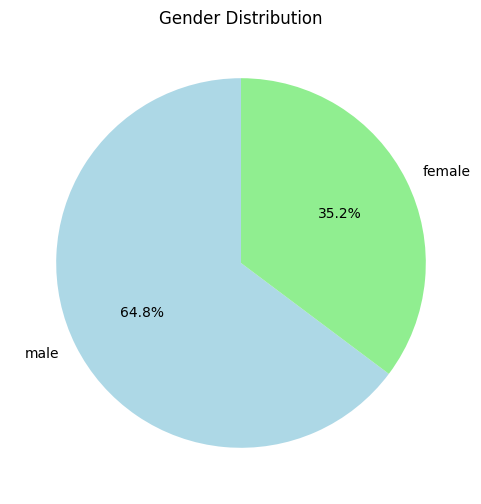

In [ ]:
# Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Removing the ylabel for better visualization
plt.show()

<ipython-input-18-e36c8e24f509>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


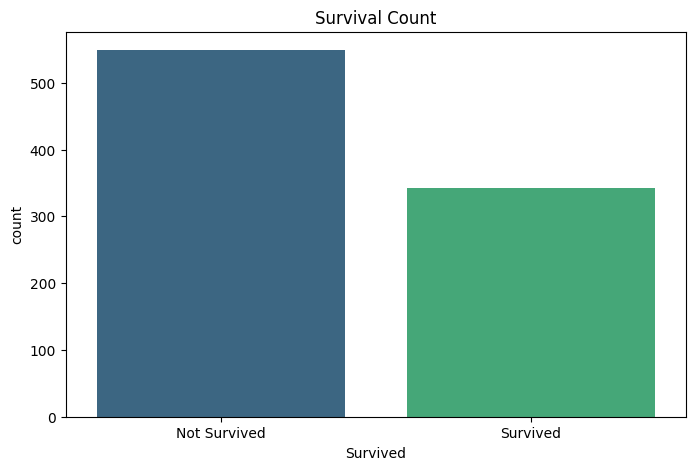

In [ ]:
# Count Plot for Survival Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

<ipython-input-21-e245bf5908ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='plasma')


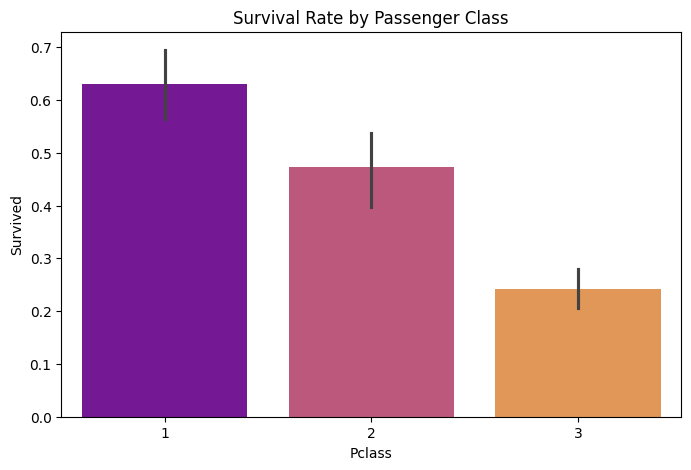

In [ ]:
# Bar Plot for Passenger Class vs Survival
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='plasma')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# Dropping irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)


In [ ]:
# Label Encoding categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Encoding 'Sex' column
df['Embarked'] = le.fit_transform(df['Embarked'])  # Encoding 'Embarked' column

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(f'{model_name} Classification Report:\n', classification_report(y_test, y_pred))
    print(f'{model_name} Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    return accuracy

In [ ]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=500)
logreg_accuracy = evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

Logistic Regression Accuracy: 0.8134
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Logistic Regression Confusion Matrix:
 [[137  20]
 [ 30  81]]


In [ ]:
# Random Forest Classifier Model
rf = RandomForestClassifier()
rf_accuracy = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")

Random Forest Accuracy: 0.7836
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268

Random Forest Confusion Matrix:
 [[130  27]
 [ 31  80]]


In [ ]:
# Decision Tree Classifier Model
dt = DecisionTreeClassifier()
dt_accuracy = evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree")

Decision Tree Accuracy: 0.7425
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.68      0.69       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268

Decision Tree Confusion Matrix:
 [[123  34]
 [ 35  76]]


In [ ]:
# Comparison of Model Accuracies
print("\n--- Model Comparisons ---")
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')



--- Model Comparisons ---
Logistic Regression Accuracy: 0.8134
Random Forest Accuracy: 0.7836
Decision Tree Accuracy: 0.7425
